# FRSign - French Railway Signalling Dataset

### Abstract

In the realm of autonomous transportation, there have been many initiatives for open-sourcing self-driving cars datasets, but much less for alternative methods of transportation such as trains. 

In this paper, we aim to bridge the gap by introducing **FRSign, a large-scale and accurate dataset for vision-based railway traffic light detection and recognition**. 

Our recordings were made on selected running trains in France and benefited from carefully hand-labeled annotations. 

An illustrative dataset which corresponds to ten percent of the acquired data to date is published in open source with the paper. It contains **more than 100,000 images illustrating six types of French railway traffic lights and their possible color combinations**, together with the relevant information regarding their acquisition such as date, time, sensor parameters, and bounding boxes. This dataset is published in open-source at the address [frsign.irt-systemx.fr](frsign.irt-systemx.fr).

We compare, analyze various properties of the dataset and provide metrics to express its variability. We also discuss specific challenges and particularities related to autonomous trains in comparison to autonomous cars.


### License

This work was made possible thanks to IRT SystemX, SNCF, and Alstom.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

### 1. Read HDF5 file content

The dataset FRSign contains two types of files:
* An HDF5 file called "frsign\_v1.0.h5": this file lists all the images contained in the dataset with their corresponding metadata. The structure of the HDF5 file is explained hereafter.
* Image files: all the images have been saved in PNG format. Their descriptions can be found in the HDF5 file.

Let's read the HDF5 store using pandas.

In [1]:
import pandas as pd

In [3]:
# HDF5 file path
store_path = "/datasets/shared_datasets/SNCF/frsign/frsign_v1.0.h5"

# Read dataframes stored in HDF5 file
store = pd.HDFStore(store_path, mode='r')
df = store.select('dataframe')
im_df = store.select('images')

### 2. Understand the data

The HDF5 file "frsign\_v1.0.h5" contains two dataframes named: 
* `/dataframe`: dataframe which contains the metadata related to all video sequences. 
* `/images`: dataframe with a double index that lists images according to their chronological order in a sequence as well as their corresponding bounding boxes. 

Hereafter is the description of the columns found in `/dataframe`:

* `camera`: Identifier of the camera that was used.
* `CameraInfo_bayerTileFormat`: Bayer tile format.
* `CameraInfo_sensorResolution`: Sensor resolution (`width` x `height`).
* `context`: Context of the recording (train in our case).
* `datetime`: Date and timestamp of the recording.
* `fps`: Frame per second.
* `image_format`: Image format (PNG).
* `on_track`: Boolean that indicates whether the railway panel is on the same track as the train.
* `optic`: Selected optic for the acquisition.
* `sensor_id`: Unique sensor identifier.
* `sensor_type`: Type of sensor that was used (camera in our case).
* `state`: State of the railway panel.
* `type`: Type of the railway panel.    
* `video_name`: Name of the video file.
* `video`: Video filepath. 

The index of `/dataframe` creates a unique identifier for each video sequence found in the table.

In [4]:
df.head()

,CameraInfo_bayerTileFormat,CameraInfo_sensorResolution,context,datetime,fps,sensor_id,sensor_type,state,type,on_track,video,video_name,optic,image_format
sequence,,,,,,,,,,,,,,
83,RGGB,1920x1200,train,2018-10-11 15:59:43.700,20.0,camera_2,camera,Feu rouge clignotant (1 feu rouge clignotant),Chassis A (3 feux verticaux),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
124,RGGB,1920x1200,train,2018-10-11 16:10:28.650,20.0,camera_2,camera,Feu rouge clignotant (1 feu rouge clignotant),Chassis C (5 feux verticaux),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
128,RGGB,1920x1200,train,2018-10-11 16:11:28.150,20.0,camera_2,camera,Feu rouge clignotant (1 feu rouge clignotant),Chassis A (3 feux verticaux),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
129,RGGB,1920x1200,train,2018-10-11 16:11:37.000,20.0,camera_2,camera,Feu rouge clignotant (1 feu rouge clignotant),Chassis A (3 feux verticaux),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8
164,RGGB,1920x1200,train,2018-10-11 16:24:12.850,20.0,camera_2,camera,Rappel 60 (2 feux jaunes clignotants verticaux),Chassis H (6 & 3 feux en S),True,Database/acquisitions/20181011/20181011_153137...,RecFile_1_20181011_153137_pointgrey_flycapture...,25,PNG8


In [9]:
len(df)

393

In [8]:
len(df[["state", "type"]].drop_duplicates())

43

Hereafter is the description of the columns found in  `/images`:

* `fullpath`: Image filepath.
* `x` : Abscissa of the upper left corner of the bounding box.
* `y` : Ordinate of the upper left corner of the bounding box.
* `w` : Width of the bounding box. 
* `h` : Height of the bounding box. 

The double index of `/images` serves to, first, identify the video sequence that contains the image, and second, create a unique identifier for the image.

In [ ]:
im_df.head()

fullpath    x    y  \
sequence image                                                                
83       0      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528   
         1      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528   
         2      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528   
         3      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528   
         4      RecFile_1_20181011_153137_pointgrey_flycapture...  882  528   

                 w   h  
sequence image          
83       0      15  21  
         1      15  21  
         2      15  21  
         3      15  21  
         4      15  21

### 3. Display the bounding box over an image

In [ ]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

In [ ]:
# Image folder path
img_folder_path = "./images/"

# Randomly chosen image for illustrative purposes
img_index = (5018, 51)

# Read the sequence's metadata from "/dataframe"
row = df.loc[img_index[0]]

# Read the image's metadata from "/images"
img_row = im_df.loc[img_index]

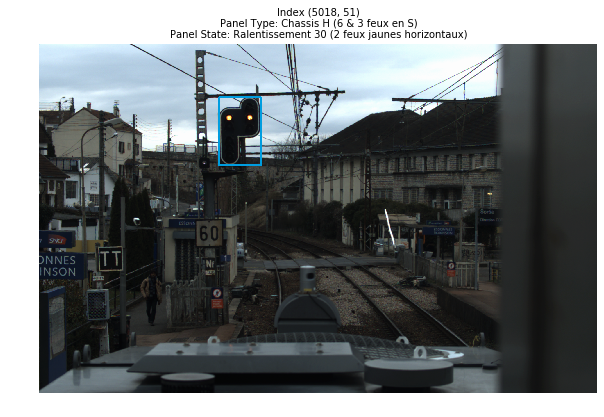

In [ ]:
img_fullpath = img_folder_path + img_row.fullpath

# Read image using OpenCV
img = cv2.imread(img_fullpath, -1)
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Add bounding box to image
bounding_box_color = (0,157,223)
bounding_box_width = 6

cv2.rectangle(img_color, 
              (img_row.x, img_row.y), (img_row.x + img_row.w, img_row.y + img_row.h), 
              bounding_box_color, 
              bounding_box_width)

# Get panel type and state to create the image title
panel_type = row.type
panel_state = row.state

plt.figure(figsize=(10, 10))
plt.title("Index " + str(img_index) + "\nPanel Type: " + panel_type + "\nPanel State: " + panel_state, {"fontsize": 10})
plt.axis('off')

# Show image
plt.imshow(img_color)
plt.show()

In [ ]:
# Close store
store.close()